# カテゴリ値を含むデータでのLightGBMを使った分析

### データ
[Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult) \
[Adult Census Income](https://www.kaggle.com/datasets/uciml/adult-census-income) \
[Adult income dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

### 参考
[lightgbmで二値分類の一連の流れをしたメモ](https://qiita.com/d_desuyon/items/807e01311ad08570ee78) \
[【初心者向け】特徴量重要度の算出 (LightGBM) 【Python】【機械学習】](https://mathmatical22.xyz/2020/04/12/%E3%80%90%E5%88%9D%E5%BF%83%E8%80%85%E5%90%91%E3%81%91%E3%80%91%E7%89%B9%E5%BE%B4%E9%87%8F%E9%87%8D%E8%A6%81%E5%BA%A6%E3%81%AE%E7%AE%97%E5%87%BA-lightgbm-%E3%80%90python%E3%80%91%E3%80%90%E6%A9%9F/) \
[LightGBMのCategorical Featureによって精度が向上するか？](https://qiita.com/sinchir0/items/b038757e578b790ec96a) \
[Pythonでしか描けない美しいデシジョンツリー（決定木）をlightGBMでも描こう！](https://qiita.com/hima2b4/items/b356e688ebdabc393da8) \
[LightGBM/XGBoostのtree構造可視化メモ](https://qiita.com/dyamaguc/items/70d4ce3548d49a6256fa) \
[Category Encodersでカテゴリ特徴量をストレスなく変換する](https://qiita.com/Hyperion13fleet/items/afa49a84bd5db65ffc31) \
[カテゴリ変数系特徴量の前処理(scikit-learnとcategory_encoders)](https://qiita.com/FukuharaYohei/items/06cc7b1c5eb124db6cdf)

In [1]:
!python -V

Python 3.9.13


In [2]:
!python -m pip --version

pip 23.0.1 from C:\Python39\lib\site-packages\pip (python 3.9)



In [3]:
!python -m pip list

Package                  Version
------------------------ -----------
aiofiles                 22.1.0
aiosqlite                0.18.0
alembic                  1.9.4
anyio                    3.6.2
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
attrs                    22.2.0
Babel                    2.11.0
backcall                 0.2.0
beautifulsoup4           4.11.2
bleach                   6.0.0
bs4                      0.0.1
category-encoders        2.6.0
certifi                  2022.12.7
cffi                     1.15.1
charset-normalizer       3.0.1
cmaes                    0.9.1
colorama                 0.4.6
colorlog                 6.7.0
comm                     0.1.2
contourpy                1.0.7
cycler                   0.11.0
debugpy                  1.6.6
decorator                5.1.1
defusedxml               0.7.1
executing                1.2.0
fastjsonschema           2.16.2
fonttools        

In [4]:
!python -m pip install -U pip

In [5]:
!python -m pip install pandas numpy scikit-learn lightgbm matplotlib

In [6]:
!python -m pip install category_encoders

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, precision_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('adult_uci.csv')

In [9]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
columns_cat = [
    'workclass',
    'education',
    'marital.status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native.country',
    #'income',
]

In [12]:
{cat:'category' for cat in columns_cat}

{'workclass': 'category',
 'education': 'category',
 'marital.status': 'category',
 'occupation': 'category',
 'relationship': 'category',
 'race': 'category',
 'sex': 'category',
 'native.country': 'category'}

In [13]:
df = df.astype({cat:'category' for cat in columns_cat})

In [14]:
for cat in columns_cat:
    print(cat, df[cat].cat.categories)

workclass Index(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype='object')
education Index(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype='object')
marital.status Index(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype='object')
occupation Index(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-moving'],
      dtype='object')
relationship Index(['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried',
       'Wife']

In [15]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [16]:
income_map = {'<=50K':0, '>50K':1}
df['income'] = df['income'].map(income_map).astype(int)

In [17]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  category
 14  income          32561 non-null  int32   
dtypes: category(8), int32(1), int64(6)
memory usage: 1.9 MB


In [19]:
#df['workclass'] = df['workclass'].replace('?',np.nan)
#df['occupation'] = df['occupation'].replace('?',np.nan)
#df['native.country'] = df['native.country'].replace('?',np.nan)
df = df.applymap(lambda d: np.nan if d=="?" else d)

In [20]:
df.isnull().sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [21]:
df = df.dropna(axis=0)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [23]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,1
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,1


In [24]:
import category_encoders as ce

In [25]:
# One-hot Encodingしたい列をリストで指定
ce_ohe = ce.OneHotEncoder(cols=columns_cat, handle_unknown='impute')

In [26]:
# DataFrameを渡してOne-hot Encodingを適用
df = ce_ohe.fit_transform(df)
df.head(10)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,...,native.country_33,native.country_34,native.country_35,native.country_36,native.country_37,native.country_38,native.country_39,native.country_40,native.country_41,income
1,82,1,0,0,0,0,0,0,132870,1,...,0,0,0,0,0,0,0,0,0,0
3,54,1,0,0,0,0,0,0,140359,0,...,0,0,0,0,0,0,0,0,0,0
4,41,1,0,0,0,0,0,0,264663,0,...,0,0,0,0,0,0,0,0,0,0
5,34,1,0,0,0,0,0,0,216864,1,...,0,0,0,0,0,0,0,0,0,0
6,38,1,0,0,0,0,0,0,150601,0,...,0,0,0,0,0,0,0,0,0,0
7,74,0,1,0,0,0,0,0,88638,0,...,0,0,0,0,0,0,0,0,0,1
8,68,0,0,1,0,0,0,0,422013,1,...,0,0,0,0,0,0,0,0,0,0
10,45,1,0,0,0,0,0,0,172274,0,...,0,0,0,0,0,0,0,0,0,1
11,38,0,0,0,1,0,0,0,164526,0,...,0,0,0,0,0,0,0,0,0,1
12,52,1,0,0,0,0,0,0,129177,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Columns: 105 entries, age to income
dtypes: int64(105)
memory usage: 24.4 MB


In [28]:
# 変換前：文字列と変換後：数値の対応関係を確認
ce_ohe.category_mapping

[{'col': 'workclass',
  'mapping': Private             1
  State-gov           2
  Federal-gov         3
  Self-emp-not-inc    4
  Self-emp-inc        5
  Local-gov           6
  Without-pay         7
  NaN                -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'education',
  'mapping': HS-grad          1
  7th-8th          2
  Some-college     3
  10th             4
  Doctorate        5
  Prof-school      6
  Bachelors        7
  Masters          8
  11th             9
  Assoc-voc       10
  1st-4th         11
  5th-6th         12
  Assoc-acdm      13
  12th            14
  9th             15
  Preschool       16
  NaN             -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'marital.status',
  'mapping': Widowed                  1
  Divorced                 2
  Separated                3
  Never-married            4
  Married-civ-spouse       5
  Married-spouse-absent    6
  Married-AF-spouse        7
  NaN                     -2
  dtype: int64,
  'data_typ

In [29]:
import csv
df.to_csv('adult_uci_onehot.csv', index=False, header=True, encoding='UTF-8', sep=',', quoting=csv.QUOTE_ALL)

In [30]:
# 不要カラムの削除と並べ替え
'''
df = df[["age",
         "workclass",
         #"fnlwgt",
         "education",
         "education.num",
         "marital.status",
         "occupation",
         "relationship",
         "race",
         "sex",
         "capital.gain",
         "capital.loss",
         "hours.per.week",
         "native.country",
         "income",]]
'''
df = df.drop(["fnlwgt"], axis=1)
df.head(10)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native.country_33,native.country_34,native.country_35,native.country_36,native.country_37,native.country_38,native.country_39,native.country_40,native.country_41,income
1,82,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,54,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,41,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,34,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,38,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,74,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,68,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,38,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,52,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
X = df.drop(['income'], axis=1)
y = df['income']

#Creation of Train and Test dataset
X_train, X_test , y_train, y_test  = train_test_split(X      , y      , test_size=0.2, shuffle=False)

#Creation of Train and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [32]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_valid.shape, y_valid.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (19303, 103)(19303,)
Validation dataset: (4826, 103)(4826,)
Test dataset: (6033, 103)(6033,)


In [33]:
# データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [34]:
# LightGBM のハイパーパラメータ
params = {
    # 二値分類問題
    'objective': 'binary',
    # AUC の最大化を目指す
    'metric': 'auc',
    # Fatal の場合出力
    'verbosity': -1,
    # 乱数シード
    'seed': 31,
    # 学習率
    'learning_rate': 0.02,
}

In [35]:
# 上記のパラメータでモデルを学習する
model = lgb.train(params, lgb_train, valid_sets=lgb_valid,
                  verbose_eval=50,  # 50イテレーション毎に学習結果出力
                  num_boost_round=10000,  # 最大イテレーション回数指定
                  early_stopping_rounds=100
                 )

Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.889524
[100]	valid_0's auc: 0.895641
[150]	valid_0's auc: 0.899847
[200]	valid_0's auc: 0.901449
[250]	valid_0's auc: 0.902116
[300]	valid_0's auc: 0.902619
[350]	valid_0's auc: 0.903006
[400]	valid_0's auc: 0.903235
[450]	valid_0's auc: 0.90335
[500]	valid_0's auc: 0.903194
[550]	valid_0's auc: 0.902898
Early stopping, best iteration is:
[454]	valid_0's auc: 0.90337


In [36]:
# テストデータを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

AUC 0.8919523138323961


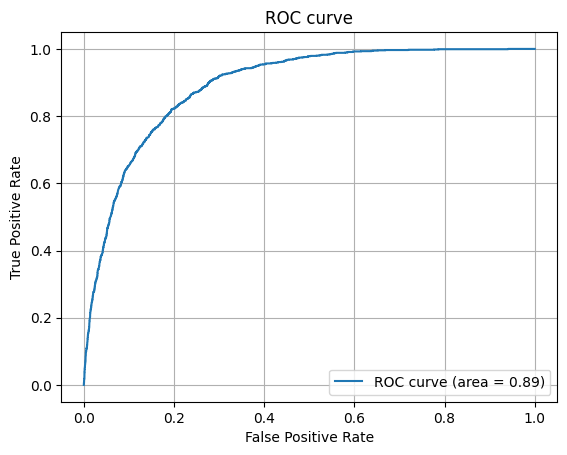

accuracy 0.8529753025029008
precision 0.6751662971175166


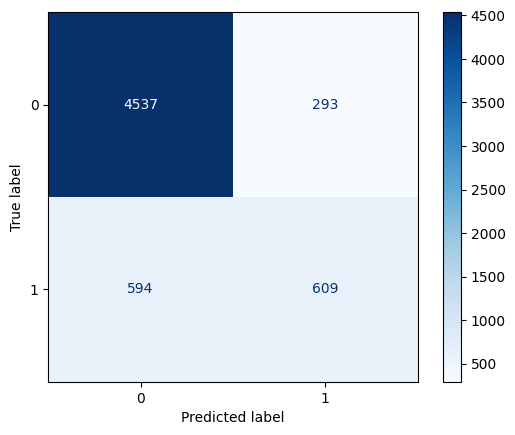

In [37]:
# AUCを計算
fpr, tpr, thresholds = roc_curve(np.asarray(y_test), y_pred)
print("AUC", auc(fpr, tpr))

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc(fpr, tpr))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# accuracy, precisionを計算
acc = accuracy_score(np.asarray(y_test), np.round(y_pred))
precision = precision_score(np.asarray(y_test), np.round(y_pred))
print("accuracy", acc)
print("precision", precision)

# 混同行列をプロット
y_pred = np.round(y_pred)
cm = confusion_matrix(np.asarray(y_test), np.where(y_pred < 0.5, 0, 1))
cmp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
cmp.plot(cmap=plt.cm.Blues)
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

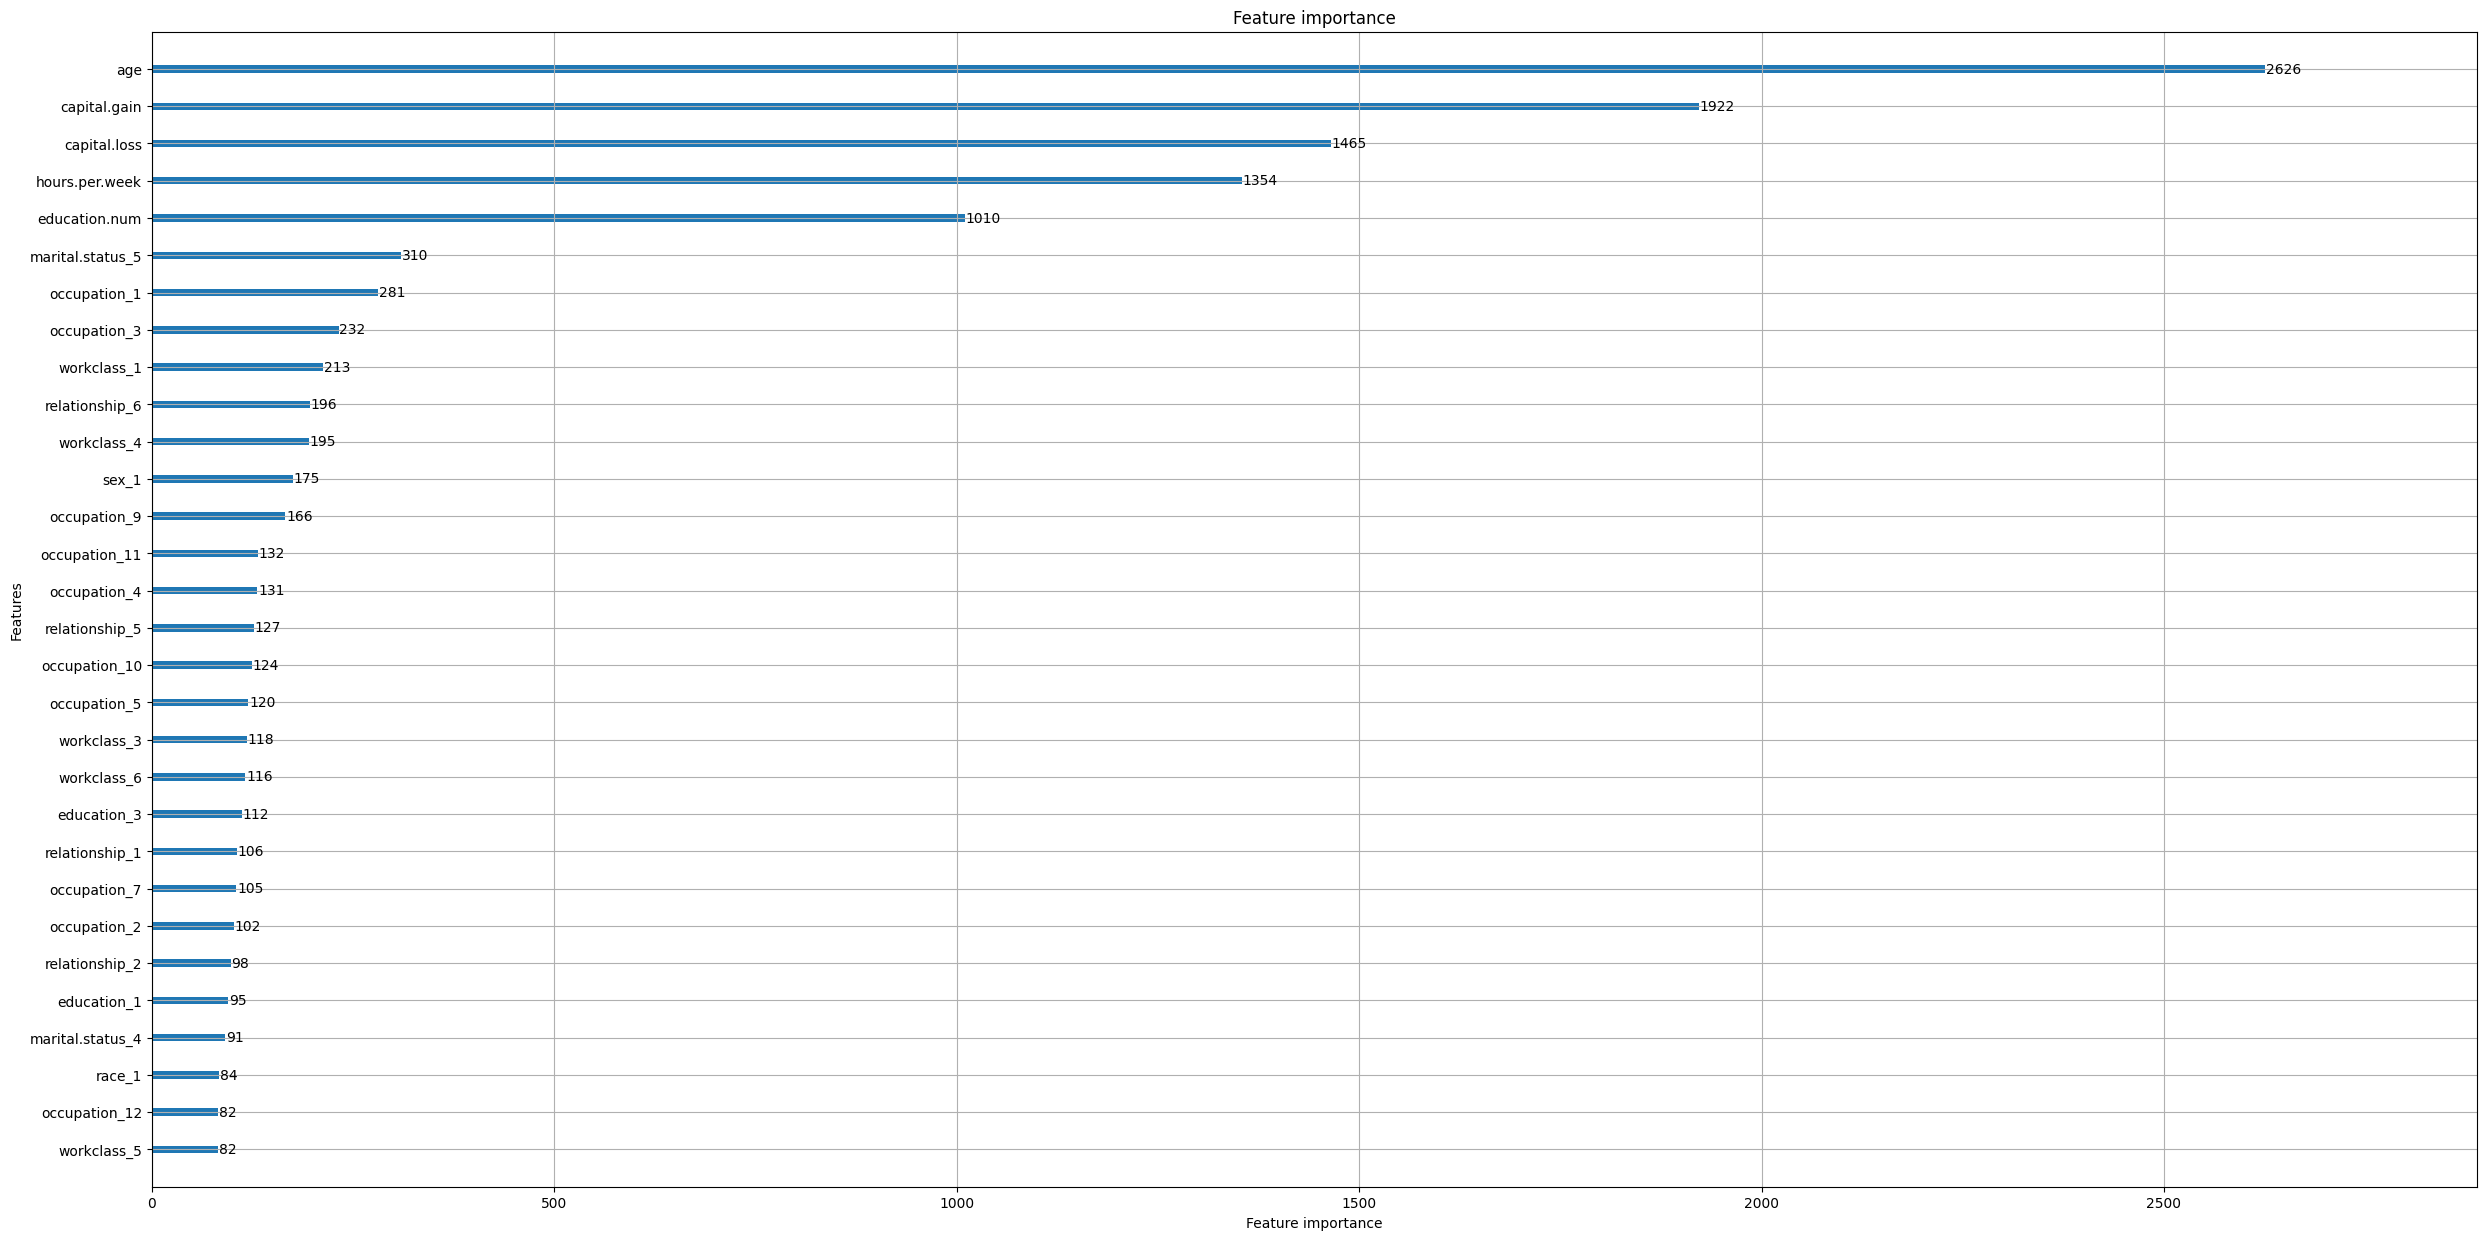

In [38]:
# 重要度としては「特徴量が分岐（ノード）の条件式で使用された回数」（＝デフォルト）
lgb.plot_importance(model, figsize=(30, 15), max_num_features=30, importance_type='split')

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

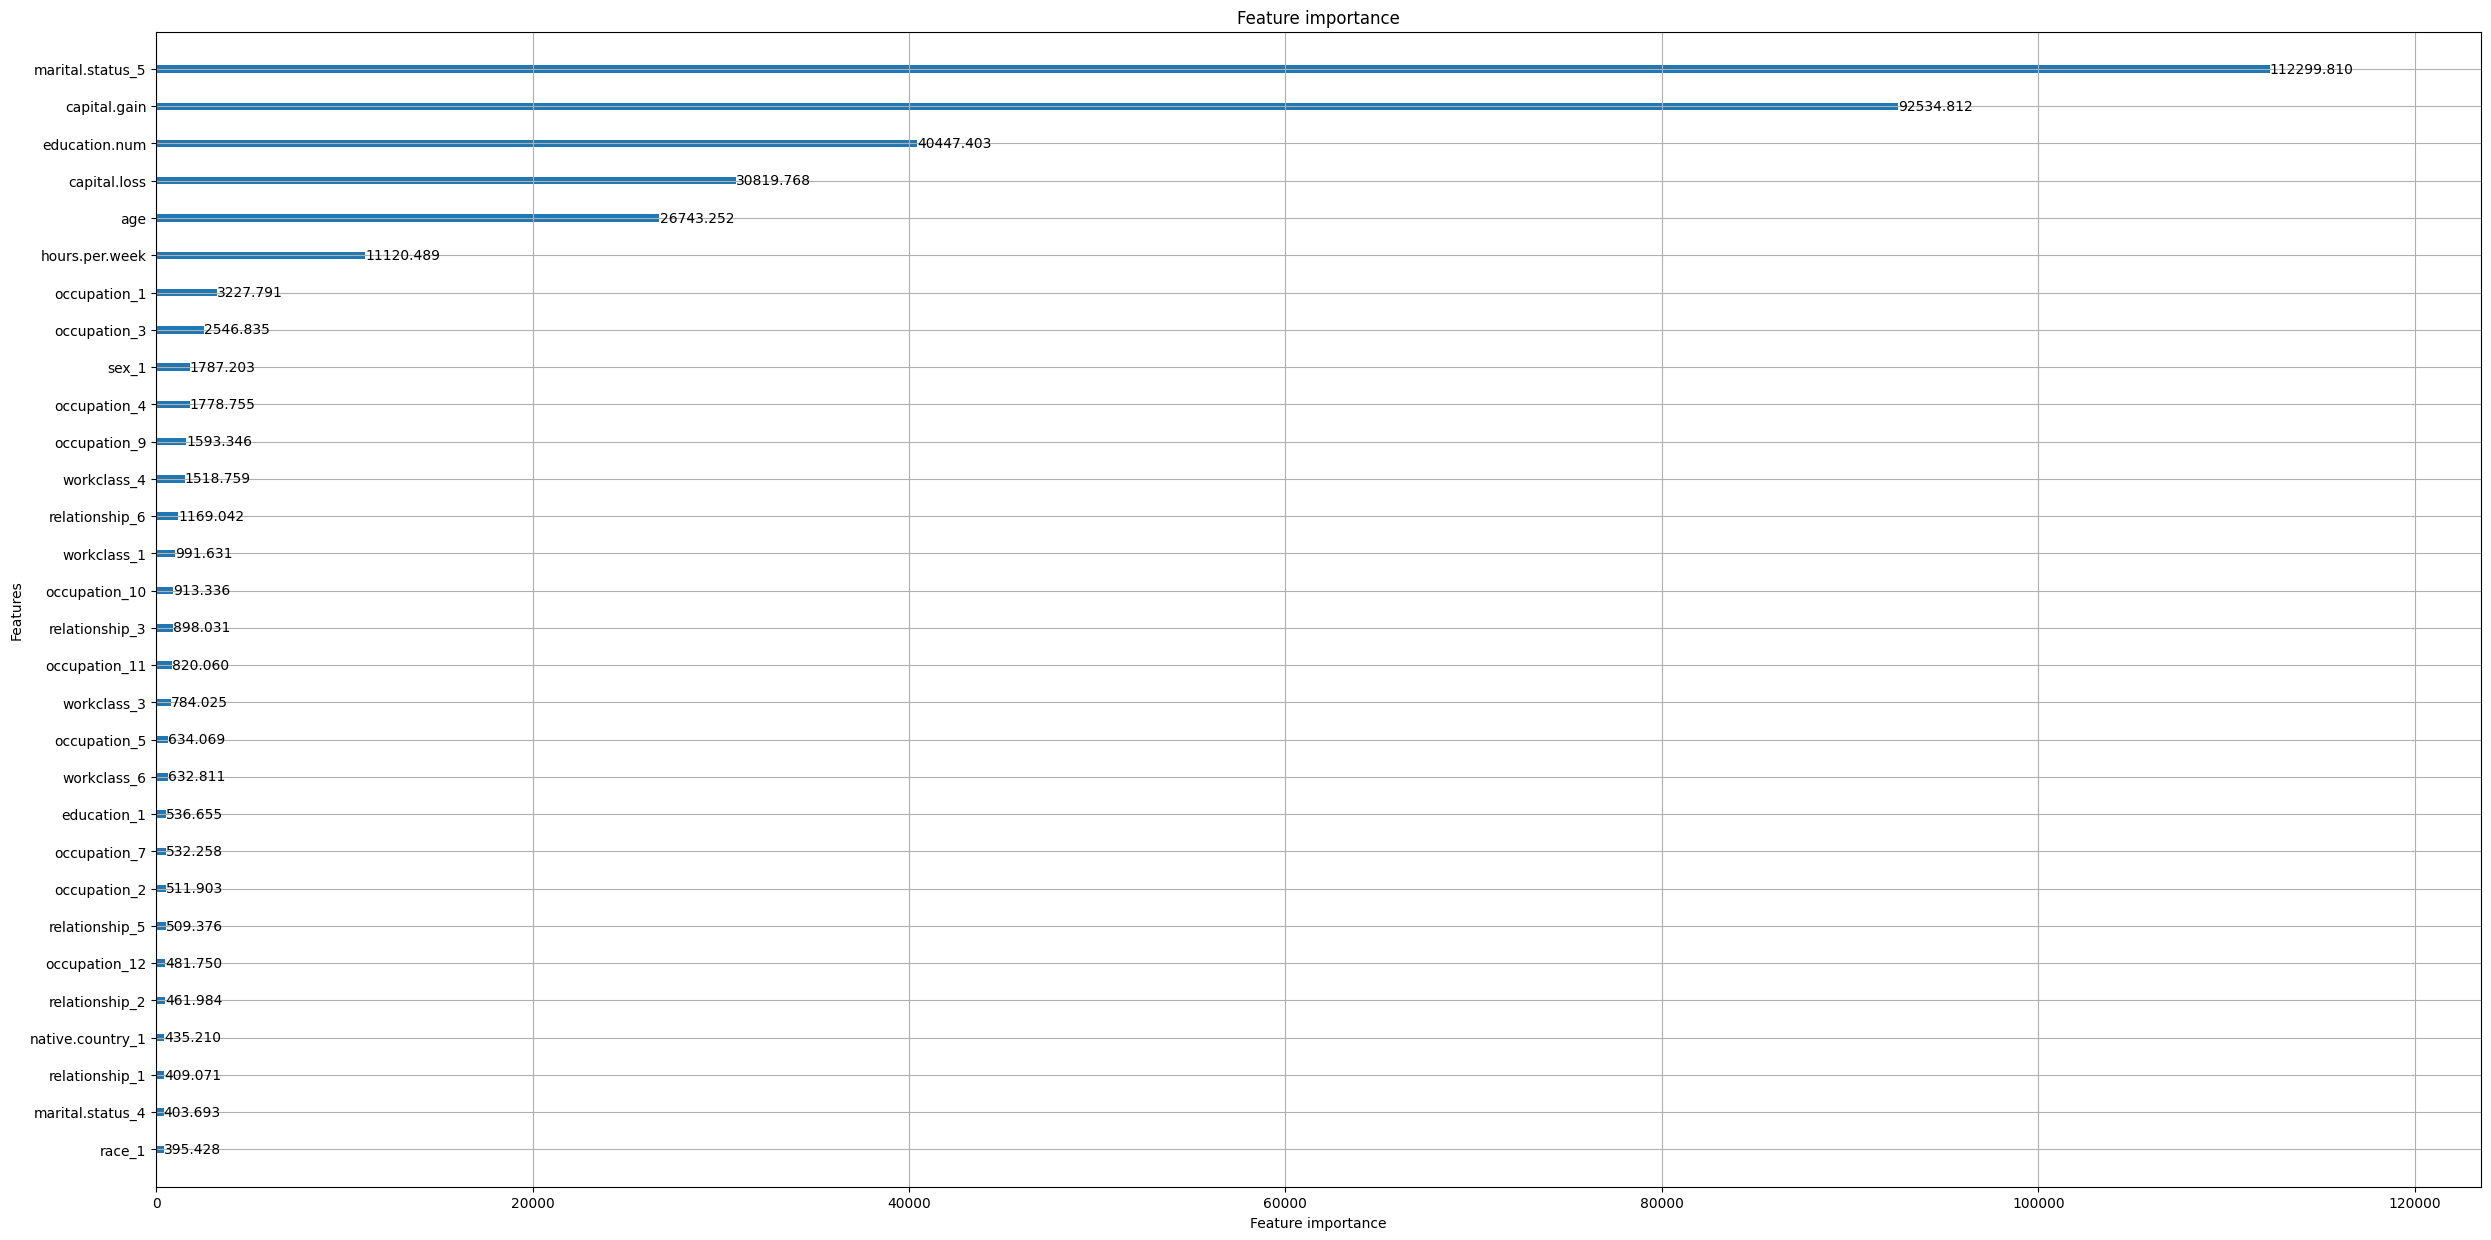

In [39]:
# 重要度としては「特徴量がある分岐（ノード）において目的関数の改善に寄与した度合い」
lgb.plot_importance(model, figsize=(30, 15), max_num_features=30, importance_type='gain')

In [40]:
# データフレームを綺麗に出力する関数
import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

In [41]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル

In [42]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(df.drop('income',axis=1).columns) # 特徴量名のリスト(目的変数target以外)
# 特徴量重要度の算出方法 'gain'(推奨) : トレーニングデータの損失の減少量を評価
f_importance = np.array(model.feature_importance(importance_type='gain')) # 特徴量重要度の算出 //
f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

,feature,importance
29,marital.status_5,0.326281
59,capital.gain,0.268855
24,education.num,0.117518
60,capital.loss,0.089545
0,age,0.077701


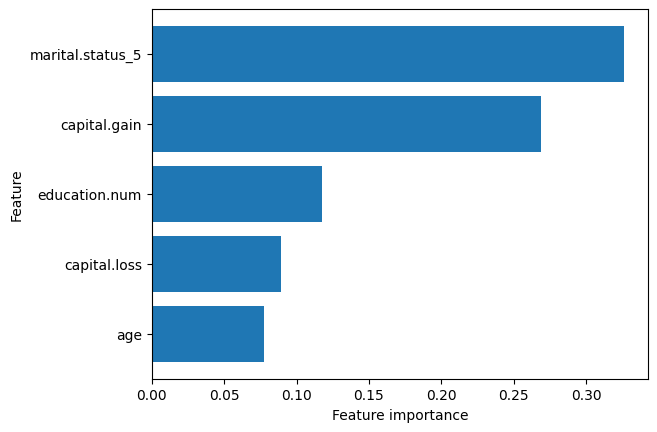

In [43]:
# 特徴量重要度の可視化
n_display = 5 # 上位10個に制限
plot_feature_importance(df_importance.iloc[:n_display,:])

In [44]:
import csv
# 決定木をDataFrameに変換
model.trees_to_dataframe().to_csv('adult_uci_onehot_decisiontree.csv', index=False, header=True, encoding='UTF-8', sep=',', quoting=csv.QUOTE_ALL)

In [45]:
df_tree = pd.read_csv('adult_uci_onehot_decisiontree.csv')

In [46]:
df_tree.head(10)

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S2,0-S1,NaN,marital.status_5,3918.679932,1.000000e-35,<=,left,None,-0.961185,0.000000,19303
1,0,2,0-S2,0-S9,0-L3,0-S0,capital.gain,1197.290039,7.073500e+03,<=,left,None,-0.980667,1995.900000,9974
2,0,3,0-S9,0-S10,0-S25,0-S2,capital.loss,146.238007,2.218500e+03,<=,left,None,-0.983372,1936.870000,9679
3,0,4,0-S10,0-L0,0-S12,0-S9,education.num,119.002998,1.250000e+01,<=,left,None,-0.983913,1918.260000,9586
4,0,5,0-L0,NaN,NaN,0-S10,NaN,NaN,NaN,NaN,NaN,NaN,-0.986455,1521.842128,7605
5,0,5,0-S12,0-L11,0-S14,0-S10,age,77.566399,2.950000e+01,<=,left,None,-0.974153,396.419000,1981
6,0,6,0-L11,NaN,NaN,0-S12,NaN,NaN,NaN,NaN,NaN,NaN,-0.985597,148.282054,741
7,0,6,0-S14,0-S26,0-L15,0-S12,hours.per.week,57.379799,4.250000e+01,<=,left,None,-0.967314,248.137000,1240
8,0,7,0-S26,0-L13,0-L27,0-S14,education.num,23.892300,1.450000e+01,<=,left,None,-0.974931,152.484000,762
9,0,8,0-L13,NaN,NaN,0-S26,NaN,NaN,NaN,NaN,NaN,NaN,-0.977117,141.678399,708


In [47]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27694 entries, 0 to 27693
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tree_index         27694 non-null  int64  
 1   node_depth         27694 non-null  int64  
 2   node_index         27694 non-null  object 
 3   left_child         13620 non-null  object 
 4   right_child        13620 non-null  object 
 5   parent_index       27240 non-null  object 
 6   split_feature      13620 non-null  object 
 7   split_gain         13620 non-null  float64
 8   threshold          13620 non-null  float64
 9   decision_type      13620 non-null  object 
 10  missing_direction  13620 non-null  object 
 11  missing_type       13620 non-null  object 
 12  value              27694 non-null  float64
 13  weight             27694 non-null  float64
 14  count              27694 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 3.2+ MB
